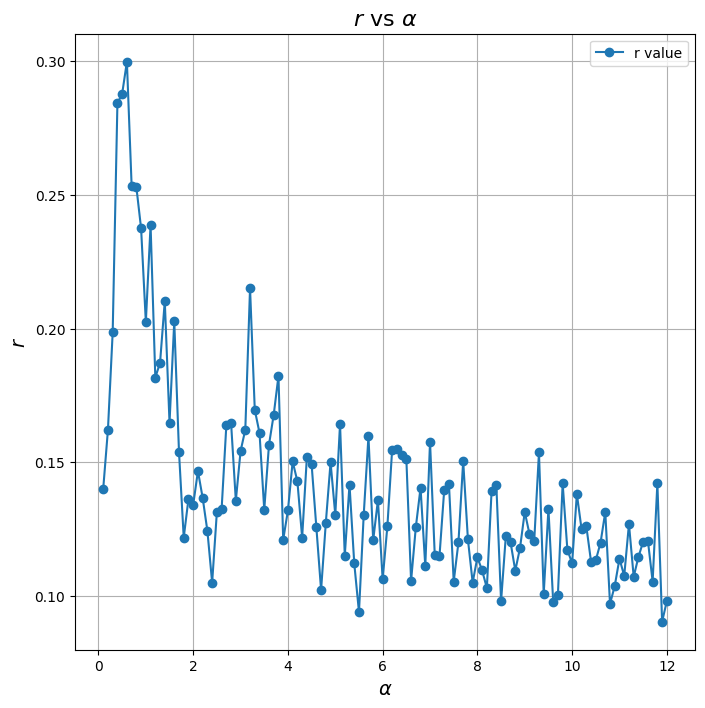

In [ ]:

#now lets write the hamiltonian H(alpha) for a ferromagnetic long-range interacting quantum Ising chain in a transverse field
# with the field term as same as before and the interaction term has sum over all i and j with i not equal to j and a factor of D(i,j) raised to power alpha as defined before
# in the denominator


import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H
# Parameters
num_sites = 4 # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength




def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    r_sum = 0.0
    for u in range(1, dim -1):
        delta1 = eigenvalues[u] - eigenvalues[u-1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r




# Vary alpha and compute r values
alpha_values = np.arange(0.1, 12.1, 0.1)
r_values = []

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigh(H)[0]
    eigenvalues = np.sort(eigenvalues)

    # Compute r value
    r = compute_r(eigenvalues)
    r_values.append(r)
#np.savetxt("data_entries_N4.dat",np.c_[r_values])

# Store the results in a text file
#with open("r_values.txt", "w") as f:
 #   for alpha, r in zip(alpha_values, r_values):
  ##      f.write(f"{alpha:.1f}\t{r}\n")

# Plotting r vs alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(alpha_values, r_values, 'o-', label='r value')

plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
plt.title(r'$r$ vs $\alpha$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
alpha_values = np.arange(0.1, 12.1, 0.1)
r_values = []

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigh(H)[0]
    eigenvalues = np.sort(eigenvalues)

    # Compute r value
    r = compute_r(eigenvalues)
    r_values.append(r)
    print(f"Alpha: {alpha:.1f}, r value: {r}")

# Plotting r vs alpha
import matplotlib.pyplot as plt
r_values_im =np.loadtxt('data_entries_N4.dat')

plt.figure(figsize=(8, 8))
plt.plot(alpha_values, r_values, 'o-', label='r value')
plt.plot(alpha_values, r_values_im, 'o-', label='r value')

plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)
plt.title(r'$r$ vs $\alpha$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operator, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = np.eye(1)  # Start with the identity matrix
    for i in range(num_sites):
        op = np.kron(op, operator if i == site else I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2 ** num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def total_spin_operator(num_sites):
    """Constructs the total spin operator J as the sum of Pauli Z operators on all sites."""
    sigma_x, sigma_z = pauli_matrices()
    J = np.zeros((2 ** num_sites, 2 ** num_sites))
    for i in range(num_sites):
        J += tensor_product(sigma_z, num_sites, i)
    return J

# Parameters
num_sites = 4  # Number of lattice sites
J_coupling = 1.0  # Coupling constant
h = 0.5  # Transverse field strength
alpha = 2.0  # Interaction decay exponent

# Construct the Hamiltonian
H = long_range_ising_model(num_sites, J_coupling, h, alpha)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Construct the total spin operator J
J_op = total_spin_operator(num_sites)

# Compute J^2
J_squared = np.dot(J_op, J_op)

# Compute the expectation value of J^2 for each eigenvector
expectation_values = np.array([np.dot(np.conj(psi).T, np.dot(J_squared, psi)) for psi in eigenvectors.T])

print("Eigenvalues:")
print(eigenvalues)
print("\nExpectation values of J^2 for each eigenstate:")
print(expectation_values)

# Check if any expectation value of J^2 is zero
zero_expectation_indices = np.where(np.isclose(expectation_values, 0))[0]
if zero_expectation_indices.size > 0:
    print("\nEigenstates with expectation value of J^2 equal to zero:")
    print(zero_expectation_indices)
else:
    print("\nNo eigenstates with expectation value of J^2 equal to zero.")


Eigenvalues:
[-3.37574640e+00 -3.30277564e+00 -1.12597569e+00 -8.47127088e-01
 -8.47127088e-01 -3.69924076e-01 -1.16861882e-16  6.96676673e-17
  3.80261122e-16  3.02775638e-01  3.33333333e-01  1.18046042e+00
  1.18046042e+00  1.30819884e+00  2.70325741e+00  2.86018991e+00]

Expectation values of J^2 for each eigenstate:
[1.42059531e+01 1.49923018e+01 3.70791499e+00 2.32879797e+00
 2.32879797e+00 3.51851320e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 5.00769823e+00 9.80913818e-31 1.67120203e+00
 1.67120203e+00 1.18300687e+00 4.81486795e-01 9.03125003e-01]

Eigenstates with expectation value of J^2 equal to zero:
[10]


In [ ]:
import numpy as np
import itertools

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def project_to_symmetric_subspace(H, num_sites):
    """Projects the Hamiltonian onto the symmetric subspace."""
    dim = 2**num_sites
    basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]

    # Identify symmetric states
    symmetric_states = []
    for state in basis_states:
        state_vec = np.array([int(bit) for bit in state])
        if (np.all(state_vec == state_vec[::-1]) and
            np.sum(state_vec) % 2 == 0):
            symmetric_states.append(state)

    # Construct the projection matrix
    P = np.zeros((dim, len(symmetric_states)), dtype=complex)
    for i, state in enumerate(symmetric_states):
        state_vec = np.array([int(bit) for bit in state])
        idx = int("".join(map(str, state_vec)), 2)
        P[idx, i] = 1

    # Project the Hamiltonian
    H_symmetric = P.T.conj().dot(H).dot(P)

    return H_symmetric

def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    r_sum = 0.0
    for u in range(1, dim - 1):
        delta1 = eigenvalues[u] - eigenvalues[u - 1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r

# Parameters
num_sites = 6  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength

# Alpha values and corresponding r values
alpha_values = np.arange(0, 12.1, 0.1)  # Alpha values from 0 to 12 in steps of 0.1
r_values = []

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Project to symmetric subspace
    H_symmetric = project_to_symmetric_subspace(H, num_sites)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigh(H_symmetric)[0]
    eigenvalues = np.sort(eigenvalues)

    # Compute r value
    r = compute_r(eigenvalues)
    r_values.append(r)

print(r_values)

<ipython-input-3-e1fe899389b0>:91: RuntimeWarning: invalid value encountered in scalar divide
  r_sum += min(delta1, delta2) / max(delta1, delta2)


[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, nan, 0.0, 0.0]


In [ ]:
import numpy as np
import itertools

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if not np.array_equal(state_vec, shifted_state):
            return False

    return True

def project_to_symmetric_subspace(H, num_sites):
    """Projects the Hamiltonian onto the symmetric subspace."""
    dim = 2**num_sites
    basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]

    # Identify symmetric states
    symmetric_states = []
    for state in basis_states:
        if is_symmetric(state, num_sites):
            symmetric_states.append(state)

    # Construct the projection matrix
    P = np.zeros((dim, len(symmetric_states)), dtype=complex)
    for i, state in enumerate(symmetric_states):
        state_vec = np.array([int(bit) for bit in state])
        idx = int("".join(map(str, state_vec)), 2)
        P[idx, i] = 1

    # Project the Hamiltonian
    H_symmetric = P.T.conj().dot(H).dot(P)

    return H_symmetric

def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    r_sum = 0.0
    for u in range(1, dim - 1):
        delta1 = eigenvalues[u] - eigenvalues[u - 1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r

# Parameters
num_sites = 4  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength

# Alpha values and corresponding r values
alpha_values = np.arange(0, 12.1, 0.1)  # Alpha values from 0 to 12 in steps of 0.1
r_values = []

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Project to symmetric subspace
    H_symmetric = project_to_symmetric_subspace(H, num_sites)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigh(H_symmetric)[0]
    eigenvalues = np.sort(eigenvalues)

    # Compute r value
    r = compute_r(eigenvalues)
    r_values.append(r)

print(r_values)
print("Alpha values and corresponding r values have been saved to r_values.txt")


ZeroDivisionError: float division by zero

In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    if N == 1:
        return 0
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if not np.array_equal(state_vec, shifted_state):
            return False

    return True

def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    r_sum = 0.0
    for u in range(1, dim - 1):
        delta1 = eigenvalues[u] - eigenvalues[u - 1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r

# Parameters
num_sites = 4  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength
alpha = 2.0   # Interaction range exponent

# Construct Hamiltonian
H = long_range_ising_model(num_sites, J, h, alpha)

# Diagonalize Hamiltonian to get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Identify symmetric eigenstates
symmetric_indices = []
dim = 2**num_sites
basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]
for i, state in enumerate(basis_states):
    if is_symmetric(state, num_sites):
        symmetric_indices.append(i)

# Select symmetric eigenvalues
symmetric_eigenvalues = eigenvalues[symmetric_indices]

# Compute r value for symmetric eigenvalues
r = compute_r(np.sort(symmetric_eigenvalues))

print(f"r value for alpha = {alpha}: {r}")

# Varying alpha and storing results
alpha_values = np.arange(0, 12.1, 0.1)  # Alpha values from 0 to 12 in steps of 0.1
r_values = []

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Diagonalize Hamiltonian to get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Select symmetric eigenvalues
    symmetric_eigenvalues = eigenvalues[symmetric_indices]

    # Compute r value
    r = compute_r(np.sort(symmetric_eigenvalues))
    r_values.append(r)

# Store the results in a text file
with open("r_values.txt", "w") as f:
    for alpha, r in zip(alpha_values, r_values):
        f.write(f"{alpha:.1f}\t{r}\n")

print("Alpha values and corresponding r values have been saved to r_values.txt")


ZeroDivisionError: float division by zero

In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    if N == 1:
        return 0
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if np.array_equal(state_vec, shifted_state):
            return True

    return False

def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    if dim < 3:
        return 0  # Not enough eigenvalues to compute r

    r_sum = 0.0
    for u in range(1, dim - 1):
        delta1 = eigenvalues[u] - eigenvalues[u - 1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r

# Parameters
num_sites = 4  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength

# Varying alpha and storing results
alpha_values = np.arange(0, 12.1, 0.1)  # Alpha values from 0 to 12 in steps of 0.1
r_values = []

# Precompute basis states and symmetric indices
dim = 2**num_sites
basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]
symmetric_indices = [i for i, state in enumerate(basis_states) if is_symmetric(state, num_sites)]

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Diagonalize Hamiltonian to get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Select symmetric eigenvalues
    symmetric_eigenvalues = eigenvalues[symmetric_indices]

    # Compute r value
    r = compute_r(np.sort(symmetric_eigenvalues))
    r_values.append(r)

# Store the results in a text file
with open("r_values.txt", "w") as f:
    for alpha, r in zip(alpha_values, r_values):
        f.write(f"{alpha:.1f}\t{r}\n")

print("Alpha values and corresponding r values have been saved to r_values.txt")


Alpha values and corresponding r values have been saved to r_values.txt


In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    if N == 1:
        return 0
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if np.array_equal(state_vec, shifted_state):
            return True

    return False

def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""
    dim = len(eigenvalues)
    if dim < 3:
        return 0  # Not enough eigenvalues to compute r

    r_sum = 0.0
    for u in range(1, dim - 1):
        delta1 = eigenvalues[u] - eigenvalues[u - 1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r

# Parameters
num_sites = 4  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength

# Varying alpha and storing results
alpha_values = np.arange(0, 12.1, 0.1)  # Alpha values from 0 to 12 in steps of 0.1
r_values = []

# Precompute basis states and symmetric indices
dim = 2**num_sites
basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]
symmetric_indices = [i for i, state in enumerate(basis_states) if is_symmetric(state, num_sites)]

for alpha in alpha_values:
    # Construct Hamiltonian
    H = long_range_ising_model(num_sites, J, h, alpha)

    # Diagonalize Hamiltonian to get eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Select symmetric eigenvalues
    symmetric_eigenvalues = eigenvalues[symmetric_indices]

    # Compute r value
    r = compute_r(np.sort(symmetric_eigenvalues))
    r_values.append(r)

# Store the results in a text file
with open("r_values.txt", "w") as f:
    for alpha, r in zip(alpha_values, r_values):
        f.write(f"{alpha:.1f}\t{r}\n")

print("Alpha values and corresponding r values have been saved to r_values.txt")


Alpha values and corresponding r values have been saved to r_values.txt


In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    if N == 1:
        return 0
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if np.array_equal(state_vec, shifted_state):
            return True

    return False

# Parameters
num_sites = 12  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength
alpha = 2.0   # Interaction exponent

# Construct Hamiltonian
H = long_range_ising_model(num_sites, J, h, alpha)

# Diagonalize Hamiltonian to get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Precompute basis states and symmetric indices
dim = 2**num_sites
basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]
symmetric_indices = [i for i, state in enumerate(basis_states) if is_symmetric(state, num_sites)]

# Extract symmetric eigenvectors
symmetric_eigenvectors = eigenvectors[:, symmetric_indices]

# Print symmetric eigenvectors
print("Symmetric eigenvectors:")
for vec in symmetric_eigenvectors.T:
    print(vec)


KeyboardInterrupt: 

In [ ]:
import numpy as np

def pauli_matrices():
    """Returns the Pauli matrices."""
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return sigma_x, sigma_z

def distance(i, j, N):
    """Compute the distance D(i, j) with periodic boundary conditions."""
    return min(abs(i - j), N - abs(i - j))

def tensor_product(operators, num_sites, site):
    """Constructs the tensor product for a given operator at a specific site."""
    I = np.eye(2)
    op = 1
    for i in range(num_sites):
        if i == site:
            op = np.kron(op, operators)
        else:
            op = np.kron(op, I)
    return op

def N_alpha(N, alpha):
    """Compute the sum N(alpha) for a given N and alpha."""
    if N == 1:
        return 0
    total_sum = 0.0
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if i != j:
                D = distance(i, j, N)
                total_sum += 1.0 / (D ** alpha)
    return total_sum / (N - 1)

def long_range_ising_model(num_sites, J, h, alpha):
    """Constructs the Hamiltonian matrix for the long-range Ising model in a transverse field."""
    sigma_x, sigma_z = pauli_matrices()
    dim = 2**num_sites
    H = np.zeros((dim, dim))

    # Calculate N(alpha)
    N_alpha_value = N_alpha(num_sites, alpha)

    # Transverse field term
    for i in range(num_sites):
        term = tensor_product(sigma_x, num_sites, i)
        H += h * term

    # Long-range interaction term
    for i in range(num_sites):
        for j in range(num_sites):
            if i != j:
                D = distance(i + 1, j + 1, num_sites)
                term = tensor_product(sigma_z, num_sites, i).dot(tensor_product(sigma_z, num_sites, j))
                H -= (J / N_alpha_value) * (1.0 / (D ** alpha)) * term

    return H

def is_symmetric(state, num_sites):
    """Check if a state is symmetric under translation, inversion, and Z2 symmetries."""
    state_vec = np.array([int(bit) for bit in state])

    # Check Z2 symmetry (sum of bits is even)
    if np.sum(state_vec) % 2 != 0:
        return False

    # Check inversion symmetry
    if not np.all(state_vec == state_vec[::-1]):
        return False

    # Check translational symmetry
    for shift in range(1, num_sites):
        shifted_state = np.roll(state_vec, shift)
        if np.array_equal(state_vec, shifted_state):
            return True

    return False

# Parameters
num_sites = 6  # Number of lattice sites
J = 1.0       # Coupling constant
h = 0.5       # Transverse field strength
alpha = 2.0   # Interaction exponent

# Construct Hamiltonian
H = long_range_ising_model(num_sites, J, h, alpha)

# Diagonalize Hamiltonian to get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Precompute basis states and symmetric indices
dim = 2**num_sites
basis_states = [np.binary_repr(i, num_sites) for i in range(dim)]
symmetric_indices = [i for i, state in enumerate(basis_states) if is_symmetric(state, num_sites)]

# Extract symmetric eigenvalues
symmetric_eigenvalues = eigenvalues[symmetric_indices]



def compute_r(eigenvalues):
    """Compute the r value based on the given eigenvalues."""

    r_sum = 0.0
    for u in range(1, dim -1):
        delta1 = eigenvalues[u] - eigenvalues[u-1]
        delta2 = eigenvalues[u + 1] - eigenvalues[u]
        r_sum += min(delta1, delta2) / max(delta1, delta2)
    r = r_sum / (dim - 2)
    return r


print(compute_r(symmetric_eigenvalues))

IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
import numpy as np
import scipy.linalg as la

# Define the parameters
j = 100  # Change this to desired value of j
k = 1.0  # Kick strength
alpha = 1.0  # Rotation angle

# Define the Jz matrix in the |j, m> basis
m_vals = np.arange(-j, j+1)
Jz = np.diag(m_vals)

# Define the Jx matrix in the |j, m> basis
# This uses the matrix elements for Jx in the |j, m> basis
dim = int(2*j + 1)
Jx = np.zeros((dim, dim))

for m in range(dim):
    if m < dim - 1:
        Jx[m, m + 1] = Jx[m + 1, m] = 0.5 * np.sqrt(j * (j + 1) - m_vals[m] * m_vals[m + 1])

# Define the exponential operators
expJz = np.diag(np.exp(-1j * alpha * m_vals))
expJx2 = la.expm(-1j * (k / (2 * j)) * np.dot(Jx, Jx))

# Combine to form the Floquet operator
Floquet = np.dot(expJx2, expJz)

# Diagonalize the Floquet operator
eigenvalues, eigenvectors = la.eig(Floquet)

print("Eigenvalues of the Floquet operator:\n", eigenvalues)
print("Eigenvectors of the Floquet operator:\n", eigenvectors)
print(Jz)
print(Jx)

Eigenvalues of the Floquet operator:
 [ 0.72727432-0.6863469j  -0.24128273-0.97045486j  0.8178906 +0.57537376j
  0.94441831+0.3287462j   0.97040121-0.24149845j  0.47938699-0.87760362j
 -0.1196403 +0.9928173j  -0.99930598-0.03724992j -0.87347895+0.48686191j
 -0.98599692-0.16676352j  0.96597297-0.25864303j -0.79656217-0.60455662j
 -0.78107084+0.62444242j -0.83475186+0.5506263j  -0.96669147+0.25594452j
 -0.92858308+0.37112459j -0.93239936+0.3614297j  -0.96723711+0.25387473j
 -0.65346801+0.75695413j -0.60145833+0.79890417j -0.7260156 +0.68767823j
 -0.86486833+0.50199877j -0.8367846 +0.54753222j  0.99843586-0.05590921j
 -0.47580473-0.87955094j  0.55708134+0.83045794j -0.6928581 +0.72107396j
 -0.99795699+0.06388937j -0.80549483+0.5926028j  -0.7831448 +0.62183939j
  0.62476567-0.78081231j  0.45896817-0.88845271j  0.98597659-0.1668837j
 -0.5928186 -0.80533602j  0.74594133-0.66601167j -0.97328636+0.22959456j
 -0.95273046-0.30381684j  0.01768666+0.99984358j -0.99998927+0.00463272j
 -0.18301325+0

In [ ]:
import numpy as np
import scipy.linalg as la

# Define the parameters
j = 1  # Change this to desired value of j
k = 1.0  # Kick strength
alpha = 1.0  # Rotation angle

# Define the Jz matrix in the |j, m> basis
m_vals = np.arange(-j, j+1)
Jz = np.diag(m_vals)

# Define the Jx matrix in the |j, m> basis
# This uses the matrix elements for Jx in the |j, m> basis
dim = int(2*j + 1)
Jx = np.zeros((dim, dim))

for m in range(dim):
    if m < dim - 1:
        Jx[m, m + 1] = Jx[m + 1, m] = 0.5 * np.sqrt(j * (j + 1) - m_vals[m] * m_vals[m + 1])

# Define the exponential operators
expJz = np.diag(np.exp(-1j * alpha * m_vals))
expJx2 = la.expm(-1j * (k / (2 * j)) * np.dot(Jx, Jx))

# Combine to form the Floquet operator
Floquet = np.dot(expJx2, expJz)

# Diagonalize the Floquet operator
eigenvalues, eigenvectors = la.eig(Floquet)

print("Eigenvalues of the Floquet operator:\n", eigenvalues)
print("Eigenvectors of the Floquet operator:\n", eigenvectors)

# Define the parity operator P = exp(i * pi * (j + Jz))
parity_op = np.diag(np.exp(1j * np.pi * (j + m_vals)))

# Apply the parity operator to the eigenstates of the Floquet operator
parity_eigenvalues = []
for i in range(dim):
    psi_n = eigenvectors[:, i]
    parity_psi_n = np.dot(parity_op, psi_n)
    # Calculate the overlap to find the eigenvalue
    overlap = np.dot(np.conj(psi_n), parity_psi_n)
    parity_eigenvalues.append(overlap)

print("Parity eigenvalues:\n", parity_eigenvalues)


Eigenvalues of the Floquet operator:
 [0.71802477+0.69601755j 0.29643742-0.95505228j 0.87758256-0.47942554j]
Eigenvectors of the Floquet operator:
 [[ 0.98916976+0.j         0.07930338-0.1235077j  0.        +0.j       ]
 [-0.        +0.j         0.        -0.j         1.        +0.j       ]
 [-0.07930338-0.1235077j  0.98916976+0.j         0.        +0.j       ]]
Parity eigenvalues:
 [(1-3.469446951953614e-18j), (1-2.393918396847994e-16j), (-1+1.2246467991473532e-16j)]


Eigenvalues of the Floquet operator:
 [ 0.66633314+0.74565418j  0.67088896+0.74155783j  0.8048259 +0.59351097j
 ...  0.25604238-0.96666556j  0.85234188+0.52298502j
 -0.99948783+0.03200132j]
Eigenvectors of the Floquet operator:
 [[ 2.82704414e-016+2.42184291e-016j  5.45300389e-016-3.26289363e-016j
  -7.24882382e-015+4.75086495e-014j ...  1.60838845e-042-1.03031804e-042j
   9.42653336e-043+2.63494968e-043j -4.29116501e-044+6.71072718e-044j]
 [-1.48184989e-003+4.35110386e-004j -3.24476153e-016-1.24286174e-016j
   4.08566434e-019+1.27244949e-017j ... -2.09406826e-043-1.31752697e-043j
  -2.84586472e-041+1.84515407e-041j  9.15419795e-044+1.21188361e-043j]
 [ 3.27902319e-016+3.91415402e-015j  1.09262406e-015+2.58324014e-015j
  -8.25254128e-012+2.42249910e-012j ...  4.40091745e-041+2.83592363e-041j
   4.14162504e-042+2.33641811e-041j -2.18171544e-042-2.98386557e-043j]
 ...
 [-1.47556062e-177-3.22003933e-178j  9.54385710e-177-3.14865318e-177j
   8.40383593e-178+5.20772323e-178j ...  5.08531310

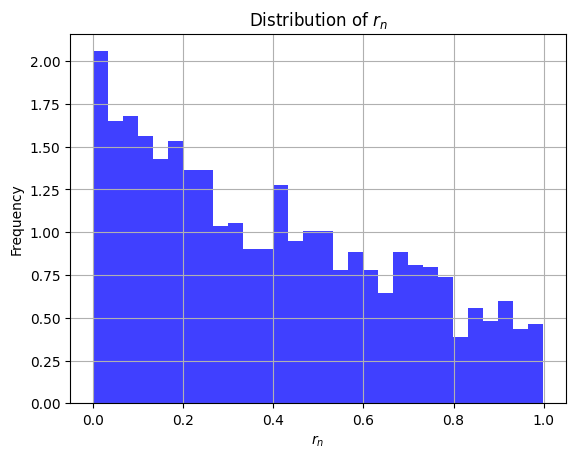

In [ ]:
# FINAL CODE DRAFT FOR QUANTUM KICKED TOP

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Define the parameters
j = 2000  # Change this to the desired value of j
k = 0.4  # Kick strength
alpha = 4*(np.pi)/11  # Rotation angle

# Define the Jz matrix in the |j, m> basis
m_vals = np.arange(-j, j+1)
Jz = np.diag(m_vals)

# Define the Jx matrix in the |j, m> basis
dim = int(2*j + 1)
Jx = np.zeros((dim, dim))

for m in range(dim):
    if m < dim - 1:
        Jx[m, m + 1] = Jx[m + 1, m] = 0.5 * np.sqrt(j * (j + 1) - m_vals[m] * m_vals[m + 1])

# Define the exponential operators
expJz = np.diag(np.exp(-1j * alpha * m_vals))
expJx2 = la.expm(-1j * (k / (2 * j)) * np.dot(Jx, Jx))

# Combine to form the Floquet operator
Floquet = np.dot(expJx2, expJz)

# Diagonalize the Floquet operator
eigenvalues, eigenvectors = la.eig(Floquet)

print("Eigenvalues of the Floquet operator:\n", eigenvalues)
print("Eigenvectors of the Floquet operator:\n", eigenvectors)

# Define the parity operator P = exp(i * pi * (j + Jz))
parity_op = np.diag(np.exp(1j * np.pi * (j + m_vals)))

# Apply the parity operator to the eigenstates of the Floquet operator
parity_eigenvalues = []
for i in range(dim):
    psi_n = eigenvectors[:, i]
    parity_psi_n = np.dot(parity_op, psi_n)
    # Calculate the overlap to find the eigenvalue
    overlap = np.dot(np.conj(psi_n), parity_psi_n)
    parity_eigenvalues.append(overlap)

# Filter for states with a +1 eigenvalue with the parity operator
filtered_eigenvalues = []
filtered_eigenvectors = []

for i, parity_eval in enumerate(parity_eigenvalues):
    if np.isclose(parity_eval, 1, atol=1e-10):
        filtered_eigenvalues.append(eigenvalues[i])
        filtered_eigenvectors.append(eigenvectors[:, i])

filtered_eigenvalues = np.array(filtered_eigenvalues)
filtered_eigenvectors = np.array(filtered_eigenvectors).T

print("Filtered Eigenvalues with +1 Parity:\n", filtered_eigenvalues)
print("Filtered Eigenvectors with +1 Parity:\n", filtered_eigenvectors)


# Sort the filtered eigenvalues
sorted_filtered_eigenvalues = np.sort(np.angle(filtered_eigenvalues))

# Calculate d_n = U_{n+1} - U_n
d_n = np.diff(sorted_filtered_eigenvalues)

# Calculate r_n = min(d_n, d_{n+1}) / max(d_n, d_{n+1})
r_n = np.minimum(d_n[:-1], d_n[1:]) / np.maximum(d_n[:-1], d_n[1:])

print("r_n values:\n", r_n)
# Plot the distribution of r_n
plt.hist(r_n, bins=30, density=True, alpha=0.75, color='blue')
plt.xlabel('$r_n$')
plt.ylabel('Frequency')
plt.title('Distribution of $r_n$')
plt.grid(True)
plt.show()